Notebook to time the inference speed of different models/generation models

In [6]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from src.generate import predict_single, encode
from src.config import load_cfg, cfg, set_cfg
import torch
from timeit import default_timer as timer
import matplotlib.pyplot as plt
torch.set_num_threads(40)
#torch.set_grad_enabled(False)

In [3]:
model_path = "output/nl2bash/07-28_13:58:03"
model_name = "gpt2"
device = 'cuda'
load_cfg(model_path + '/conf.txt')
set_cfg('device', device)

In [7]:
max_length = len(tokenizer.encode(encode(query))) + 20
print(max_length)

def time_query(query, max_length=100):
    start = timer()
    r = predict_single(model, tokenizer, query, device=device, max_length=max_length, beams=1, top=1)
    delta = 1000 * (timer()-start)
    print("RESULT")
    print(r)
    return delta


80


In [8]:
%%time
query = 'Rename "file.txt" in directories "v_1", "v_2", and "v_3" each to "v_1.txt", "v_2.txt", and "v_3.txt" respectively and print the conversion'
time_query(query, max_length=max_length)

tensor([[50256, 46932,    25,  7152,   480,   366,  7753,    13, 14116,     1,
           287, 29196,   366,    85,    62,    16,  1600,   366,    85,    62,
            17,  1600,   290,   366,    85,    62,    18,     1,  1123,   284,
           366,    85,    62,    16,    13, 14116,  1600,   366,    85,    62,
            17,    13, 14116,  1600,   290,   366,    85,    62,    18,    13,
         14116,     1,  8148,   290,  3601,   262, 11315,   198, 41757,    25,
           285,    85,  2393,    13, 14116,   410,    62,    16,    13, 14116,
           410,    62,    17,    13, 14116,   410,    62,    18,    13, 14116]],
       device='cuda:0')
RESULT
mv file.txt v_1.txt v_2.txt v_3.txt
CPU times: user 471 ms, sys: 80.6 ms, total: 552 ms
Wall time: 550 ms


550.1068495213985

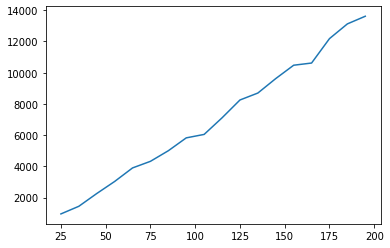

In [38]:
lengths = range(25,200,10)
deltas = [time_query(query, x) for x in lengths]

plt.plot(lengths, deltas)
# GPT2-MEDIUM